# Nearest Neighbor Regression
### M2 Modélisation

October 2025

In [1]:
import matplotlib.pyplot as plt
import math, random
import numpy as np
import scipy.stats as sps
from time import perf_counter

# 1. Theory

Given a sample $\mathcal{D}_n=\{(\mathbf{X}_1,Y_1), \ldots, (\mathbf{X}_n,Y_n)\}$ of i.i.d. random couples with the same distribution as, and independent of, a generic pair $(\mathbf{X}, Y)\in\mathbb{R}^d\times\mathbb{R}$, the $k$-nearest neighbor estimate of the regression function is defined for any $\mathbf{x}\in\mathbb{R}^d$ by
$$
r_n(\mathbf{x}):=\frac{1}{k}\sum_{i=1}^{k}Y_{(i)}(\mathbf{x})=\sum_{i=1}^{n}W_i(\mathbf{x})Y_{i},
$$
where $W_i(\mathbf{x})=1/k$ if $\mathbf{X}_i$ belongs to the $k$ nearest neighbors of $\mathbf{x}$, and 0 otherwise.

Under the following set of assumptions :
- The random variable $\mathbf{X}$ is bounded, namely $\mathbf{X}\in[0,1]^d$,
- The regression function $r$ is $L$-Lipschitz with respect to the supremum norm,
- For $\mu$-almost every $\mathbf{x}\in\mathcal{S}(\mu)$, we have $\sigma^2(\mathbf{x})\leq\sigma^2<\infty$,

we know that:
- For $d=1$, there exists a sequence $(k_n)$ with $k_n\sim\frac{\sigma\sqrt{n}}{\sqrt{2}L}$ and a universal constant $c_1=2\sqrt{2}$ such that 
$$
\mathbb{E}\left[(r_n(\mathbf{X})-r(\mathbf{X}))^2\right]\leq c_1\frac{\sigma L}{\sqrt{n}}.\hspace{1cm}(1)
$$
- For $d\geq 2$, there exists a sequence $(k_n)$ with $k_n\sim\left(\frac{\sigma^2}{4L^2}\right)^{\frac{d}{d+2}}n^{\frac{2}{d+2}}$ and a universal constant $c_d=2^{\frac{3d+2}{d+2}}$ such that
$$
\mathbb{E}\left[(r_n(\mathbf{X})-r(\mathbf{X}))^2\right]\leq c_d\left(\frac{\sigma^2 L^d}{n}\right)^{\frac{2}{d+2}}.\hspace{1cm}(2)
$$


# 2. Simulations

In order to illustrate these rates of convergence, we consider the following framework: 
$$Y=r(\mathbf{X})+\varepsilon,$$
where $\mathbf{X}\sim\mathcal{U}_{[0,1]^d}$ is independent of $\varepsilon\sim\mathcal{N}(0,\sigma^2)$, and  
$$
r(x):=L \sin\|x\|_\infty.
$$

## 2.1. Rate of convergence when everything is known

For a fixed value of $n$, we simulate $N$ samples $\mathcal{D}_n^{(j)}=\{(\mathbf{X}_1^{(j)},Y_1^{(j)}), \ldots, (\mathbf{X}_n^{(j)},Y_n^{(j)})\}$ and associate the corresponding regression estimate $r_n^{(j)}$. Then, to estimate the $L_2$ risk, we simulate an independent new point $\mathbf{X}^{(j)}$, and consider the empirical mean
$$
\frac{1}{N}\sum_{j=1}^{N}\left(r_n^{(j)}(\mathbf{X}^{(j)})-r(\mathbf{X}^{(j)})\right)^2\xrightarrow[N\to\infty]{a.s.}\mathbb{E}\left[(r_n(\mathbf{X})-r(\mathbf{X}))^2\right],
$$
where the almost sure convergence comes from the law of large numbers. 

The number $k=k_n$ of nearest neighbors is defined above and depends on $n$, $d$, $L$ and $\sigma^2$. Thus, depending on dimension $d$, we take 
$$k_n=\left\lceil\frac{\sigma\sqrt{n}}{\sqrt{2}L}\right\rceil\hspace{1cm}\mathrm{or}\hspace{1cm}\left\lceil\left(\frac{\sigma^2}{4L^2}\right)^{\frac{d}{d+2}}n^{\frac{2}{d+2}}\right\rceil.$$
The idea is to do this for several values of $n$ and compare the empirical mean
$$
\frac{1}{N}\sum_{j=1}^{N}\left(r_n^{(j)}(\mathbf{X}^{(j)})-r(\mathbf{X}^{(j)})\right)^2
$$
to the theoretical upper bound given by (1) or (2), depending on dimension $d$. 


>**Question 1.**
Write a function that, considering two sets of vectors $\mathcal X^{(\ell)}:=(\mathbf{X}_1^{(\ell)},\dots,\mathbf{X}_{n_\ell}^{(\ell)})\in\mathbb{R}^{n_\ell\times d}$ and $\mathcal X^{(t)}:=(\mathbf{X}_1^{(t)},\dots,\mathbf{X}_{n_t}^{(t)})\in\mathbb{R}^{n_t\times d}$ as arguments, returns a matrix $O\in\mathbb{R}^{n_t\times n_\ell}$ such that $O[i,j]$ is the index of the $j$-th nearest neighbor (with respect to the Euclidean distance) of $\mathbf{X}_i^{(t)}$ among the set $\mathcal X^{(\ell)}$.
>

In [3]:
def order(Xl, Xt):
    # Complete

    # End complete
    return order

>**Question 2.**
Write a code to compare the empirical risk
$$
\frac{1}{N}\sum_{j=1}^{N}\left(r_n^{(j)}(\mathbf{X}^{(j)})-r(\mathbf{X}^{(j)})\right)^2
$$
to the theoretical upper bound given by (1) or (2), depending on dimension $d$. 
>

In [7]:
def r(x, L):
    return L*np.sin(np.max(np.abs(x), axis=1))

In [9]:
def Kopt(n, d, L, sigma):
    if d==1:
        return math.ceil(sigma * np.sqrt(n) / (np.sqrt(2) * L))
    return math.ceil((sigma**2/(4 * L**2))**(d/(d+2)) * n**(2/(d+2)))

In [11]:
def L2theo(n_values, d, L, sigma):
    if d==1:
        return 2 * np.sqrt(2) * sigma * L / np.sqrt(n_values)
    return 2**((3*d+2)/(d+2)) * (sigma**2 * L**d / n_values)**(2/(d+2))

Duration (s) : 3.0


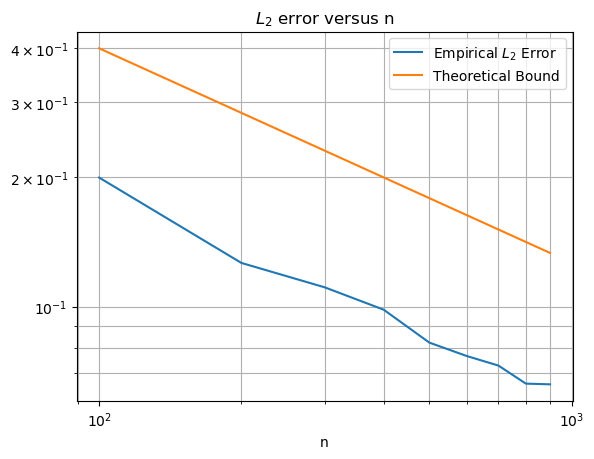

In [25]:
sigma = 1
L = 1
d = 2
n_values = np.arange(100, 1000, 100)
N = 5000

t0 = perf_counter()

# Complete

# End complete

print(f"Duration (s) : {perf_counter()-t0:1.1f}")
    
plt.plot(n_values, L2emp, label="Empirical $L_2$ Error")
plt.plot(n_values, L2theo(n_values, d, L, sigma), label="Theoretical Bound")
plt.xlabel('n')
plt.title('$L_2$ error versus n')
plt.legend(loc="best")
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both");

## 2.2. $L_2$ risk as a fonction of $k$

In this section the size sample $n$ is held fixed (but large enough) and we let $k$ vary between $1$ and $n$. We know that:
- For $d=1$,
$$
\mathbb{E}\left[(r_n(\mathbf{X})-r(\mathbf{X}))^2\right]\leq\frac{\sigma^2}{k}+2L^2\left(\frac{k}{n}\right).\hspace{1cm}(3)
$$
- For $d\geq 2$,
$$
\mathbb{E}\left[(r_n(\mathbf{X})-r(\mathbf{X}))^2\right]\leq\frac{\sigma^2}{k}+4L^2\left(\frac{k}{n}\right)^{\frac{2}{d}}.\hspace{1cm}(4)
$$

>**Question 3.**
Represent on the same plot the empirical risk
$$
\frac{1}{N}\sum_{j=1}^{N}\left(r_n^{(j)}(\mathbf{X}^{(j)})-r(\mathbf{X}^{(j)})\right)^2
$$
as a function of $k$ between $1$ and $n$, and the theoretical upper bound given by (3) or (4), depending on dimension $d$. 
>

In [28]:
def BV(n, k_values, d, L, sigma):
    if d==1:
        return sigma**2/k_values + 2 * L**2 * k_values/n
    return sigma**2/k_values + 4 * L**2 * (k_values/n)**(2/d)

Duration (s) : 16.3


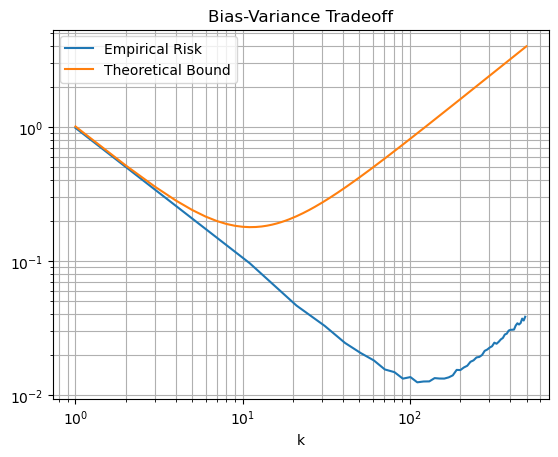

In [32]:
sigma = 1
L = 1
d = 2
n = 500
k_values = np.arange(1, n, 10)
N = 5000

t0 = perf_counter()

# Complete

# End complete
print(f"Duration (s) : {perf_counter()-t0:1.1f}")

plt.plot(k_values, L2emp, label="Empirical Risk")
k_values = np.arange(1, n)
plt.plot(k_values, BV(n, k_values, d, L, sigma), label="Theoretical Bound")
plt.xlabel('k')
plt.title('Bias-Variance Tradeoff')
plt.legend(loc="best")
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both");

## 2.3. Choice of $k$ by data splitting

To choose $k$ automatically, we split the sample $\mathcal D_n=\{(\mathbf{X}_1,Y_1), \ldots, (\mathbf{X}_n,Y_n)\}$ in two parts of size $N:=n/2 $. The first half is denoted by $\mathcal D_{n}^{\ell}$ (learning set) and is used to construct the $k$-NN estimates $r_{N}(\mathbf{x}, \mathcal D_n^{\ell})=r_{k,N}(\mathbf{x},\mathcal D_n^{\ell})$ for each $k \in \{1, \ldots, N\}$. The second half of the sample, denoted by $\mathcal D_{n}^{t}$ (testing set), is used to choose $k$ by picking $\hat k_n\in \{1, \ldots, N \}$ to minimize the empirical risk, that is
$$\hat k_n:=\arg\min_{\{1, \ldots, N \}}\frac{1}{N} \sum_{i=N+1}^{n}\left (Y_i-r_{k,N}(\mathbf{X}_i)\right)^2.$$
We then define the estimate
$$r_n(\mathbf{x})=r_{\hat k_n,N}(\mathbf{x}, \mathcal D_n^{\ell}).$$
Let $d\geq 2$, suppose that $\mathbf{X}$ has bounded support, $|Y|\leq M$, and that $r$ is $L$-Lipschitz. Let $r_n$ be the $k$-NN estimate with $k \in \{1, \ldots, N\}$ chosen by data-splitting. If $(\ln n)^{(d+2)/(2d)} n^{-1/2} \leq L$, then 
$$\mathbb E \left[\left(r_{n}(\mathbf{X})-r(\mathbf{X})\right)^2\right]\leq \Lambda\left(\frac{L^d}{n}\right)^{\frac{2}{d+2}},$$
for some positive constant $\Lambda$ which depends only on $M$, $d$, and the diameter of the support of $\mathbf{X}$. 

To illustrate this result, we consider
$$Y=r(\mathbf{X})+\varepsilon,$$
where $\mathbf{X}\sim\mathcal{U}_{[0,1]^d}$ is independent of $\varepsilon\sim\mathcal{U}_{[-M,M]}$, and  
$$
r(x)=L \sin\|x\|_\infty.
$$
In order to compare with the optimal choice of $k$ when everything is known, we thus have $\sigma=M/\sqrt{3}$.

>**Question 4.**
Represent on the same plot the empirical risk where $k$ is chosen by data splitting and the 
empirical risk where $k_n\sim\frac{\sigma\sqrt{n}}{\sqrt{2}L}$ or $k_n\sim\left(\frac{\sigma^2}{4L^2}\right)^{\frac{d}{d+2}}n^{\frac{2}{d+2}}$, depending on dimension $d$. 
>

Duration (s) : 37.8


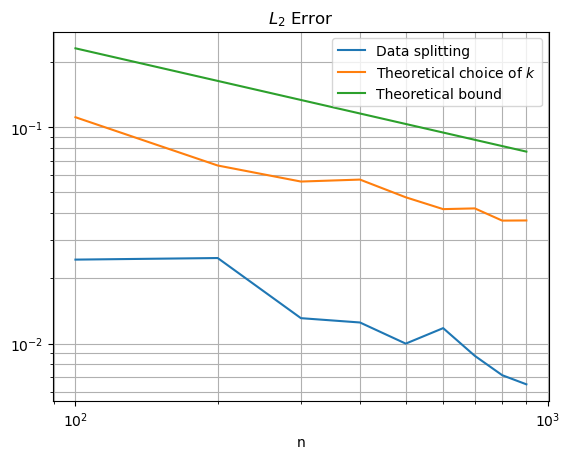

In [13]:
L = 1
M = 1
sigma = M/np.sqrt(3)
d = 2
max_of_n_over_2 = 500
n_values = np.arange(50, max_of_n_over_2, 50)
n_tot = 2 * n_values
Nds = 10 # Number of data sets
N = 10000 # Number of simulations to evaluate the empirical risk

t0 = perf_counter()

# Complete

# End complete
    
print(f"Duration (s) : {perf_counter()-t0:1.1f}")

plt.plot(n_tot, L2splitting, label="Data splitting")
plt.plot(n_tot, L2emp, label="Theoretical choice of $k$")
plt.plot(n_tot, L2theo(n_tot, d, L, sigma), label="Theoretical bound")
plt.xlabel('n')
plt.title('$L_2$ Error')
plt.legend(loc="best")
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both");         